<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-проекта:" data-toc-modified-id="Цель-проекта:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель проекта:</a></span></li><li><span><a href="#Ключевые-требования-заказчика-к-проекту:" data-toc-modified-id="Ключевые-требования-заказчика-к-проекту:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ключевые требования заказчика к проекту:</a></span></li><li><span><a href="#Инструкция-по-запуску-проекта." data-toc-modified-id="Инструкция-по-запуску-проекта.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Инструкция по запуску проекта.</a></span></li><li><span><a href="#Установка-окружения-и-импорт-библиотек" data-toc-modified-id="Установка-окружения-и-импорт-библиотек-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Установка окружения и импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-характеристик-входного-аудио-файла" data-toc-modified-id="Проверка-характеристик-входного-аудио-файла-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка характеристик входного аудио файла</a></span></li><li><span><a href="#Разбиение-на-каналы" data-toc-modified-id="Разбиение-на-каналы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Разбиение на каналы</a></span></li><li><span><a href="#Визуализация-разбиения-на-каналы" data-toc-modified-id="Визуализация-разбиения-на-каналы-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Визуализация разбиения на каналы</a></span></li><li><span><a href="#Конвертирование-битрейта-входного-файла-к-требованиям-заказчика-(8K)" data-toc-modified-id="Конвертирование-битрейта-входного-файла-к-требованиям-заказчика-(8K)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Конвертирование битрейта входного файла к требованиям заказчика (8K)</a></span></li></ul></li><li><span><a href="#Транскрибация-аудио-файла." data-toc-modified-id="Транскрибация-аудио-файла.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Транскрибация аудио файла.</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li></ul></div>

# Проект: транскрибация аудио

## Цель проекта:  
Построение системы транскрибации аудио файлов  формата MP3.  

## Ключевые требования заказчика к проекту:  
- язык для транскрибации - русский
- формат сигнала - стерео
- необходимо разделить сигнал по каналам, убрать артефакты и фантазии с галлюцинациями.
- для транскрибации использовать модель Whisper large v2 от OpenAI
- файл длительностью 22 минуты должен транскрибироваться за период длительностью не более 45 секунд на GPU NVidia типа 2250 Ti
- качество исходных аудио файлов телефонное: bit rate = 8K, sample rate = 41K и хуже
- библиотеки можно использовать любые

## Инструкция по запуску проекта.

Данный проект выполнен для запуска в среде Google Colaboratory.   
При запуске в других средах могут выскакивать ошибки и требуется настройка окружения.  
Исходному файлу для транскрибации должно быть присвоено имя "audio_sample.mp3" и он должен быть загружен в основную директорию среды Google Colaboratory ("content").

## Установка окружения и импорт библиотек

In [12]:
# installation of the necessary environment
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg
!pip install -U whisper-ctranslate2
!pip install pydub
!pip install mutagen
!pip install librosa

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-wsn1flh6
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-wsn1flh6
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 http://a

In [13]:
# import of libraries
from scipy import signal
import matplotlib.pyplot as plt
import torchaudio
from pydub import AudioSegment
import librosa
from mutagen.mp3 import MP3
import IPython
import soundfile as sf

In [14]:
# check of the available GPU resources
!nvidia-smi

Mon Jan 15 16:33:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Загрузка и предобработка данных

### Проверка характеристик входного аудио файла

In [15]:
# define the function for bitrate check
def get_bitrate(mp3_file):
    audio = MP3(mp3_file)
    bitrate = audio.info.bitrate // 1000  # Convert from bits per second to kilobits per second
    return bitrate

In [16]:
# define the function for sample rate check
def get_sample_rate(mp3_file):
    audio = AudioSegment.from_file(mp3_file)
    sample_rate = audio.frame_rate
    return sample_rate

In [17]:
# audio file parameteres check
mp3_file = "audio_sample.mp3"
bitrate = get_bitrate(mp3_file)
print(f"The bitrate of the MP3 file is {bitrate} Kbps.")
sample_rate = get_sample_rate(mp3_file)
print(f"The sample rate of the MP3 file is {sample_rate} Hz.")

The bitrate of the MP3 file is 32 Kbps.
The sample rate of the MP3 file is 44100 Hz.


**Вывод:**  
характеристики входного аудио файла: bit rate = 32K, sample rate = 44100 Hz.

### Разбиение на каналы

In [18]:
# Load the stereo audio file
audio = AudioSegment.from_file("audio_sample.mp3", format="mp3")

# Split the audio into two mono channels
left_channel = audio.split_to_mono()[0]
right_channel = audio.split_to_mono()[1]

# Save the left channel as an MP3 file
left_channel.export("left_channel.mp3", format="mp3")

# Save the right channel as an MP3 file
right_channel.export("right_channel.mp3", format="mp3")

<_io.BufferedRandom name='right_channel.mp3'>

### Визуализация разбиения на каналы

In [19]:
left_channel_up, sr_l = librosa.load("left_channel.mp3")
right_channel_up, sr_r = librosa.load("right_channel.mp3")


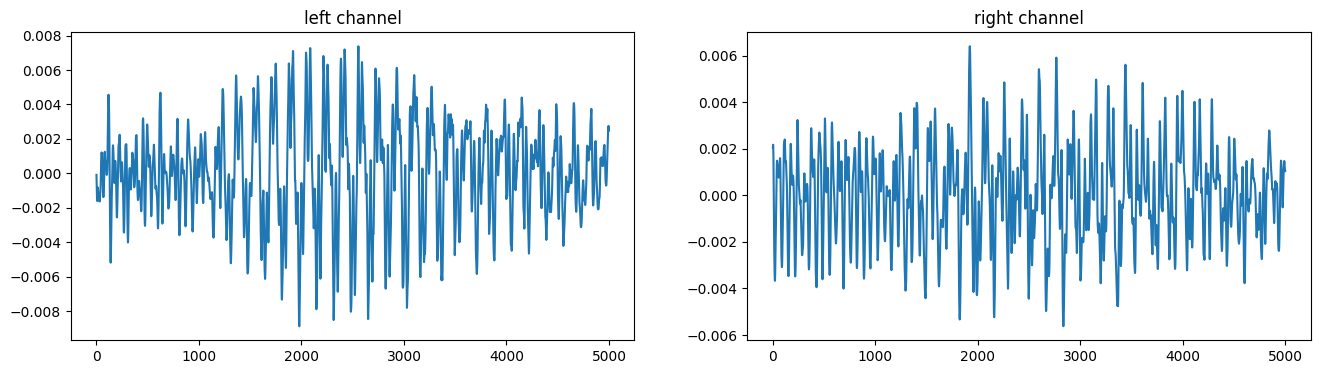

In [20]:
# visualization of channels
plt.figure(figsize=[16, 4])
plt.subplot(1, 2, 1)
plt.title("left channel")
plt.plot(left_channel_up[20000:25000])

plt.subplot(1, 2, 2)
plt.title("right channel")
plt.plot(right_channel_up[20000:25000])

plt.show()

### Конвертирование битрейта входного файла к требованиям заказчика (8K)

В качестве входного файла для транскрибации выберем один из каналов: правый.

In [21]:
#set the path to selected audio file
input_file = "right_channel.mp3"
output_file_8k = "mono_8k.mp3"

# Load the MP3 file
audio = AudioSegment.from_file(input_file)

# Set the sample rate to 8K
audio = audio.set_frame_rate(8000)

# Set the audio quality to 8K
audio = audio.set_sample_width(1).set_channels(1)

# Export the converted file
audio.export(output_file_8k, format="mp3")



<_io.BufferedRandom name='mono_8k.mp3'>

In [22]:
# initial audio file parameteres check
bitrate = get_bitrate(input_file)
print(f"The bitrate of the MP3 file is {bitrate} Kbps.")
sample_rate = get_sample_rate(input_file)
print(f"The sample rate of the MP3 file is {sample_rate} Hz.")

The bitrate of the MP3 file is 64 Kbps.
The sample rate of the MP3 file is 44100 Hz.


In [23]:
# final 8k audio file parameteres check
bitrate = get_bitrate(output_file_8k)
print(f"The bitrate of the MP3 file is {bitrate} Kbps.")
sample_rate = get_sample_rate(output_file_8k)
print(f"The sample rate of the MP3 file is {sample_rate} Hz.")

The bitrate of the MP3 file is 8 Kbps.
The sample rate of the MP3 file is 8000 Hz.


**Вывод:**  
характеристики входного аудио файла соответствуют требованиям заказчика для целей испытания моделей -  bit rate = 8K, sample rate = 8KHz, что существенно хуже, чем 41KHz.

## Транскрибация аудио файла.

Для транскрибации, согласно требованиям заказчика, используется модель Whisper large v2 от OpenAI, котроая характеризуется высоким качеством распознавания, но требовательна к быстродействию вычислительных ресурсов.

In [24]:
%%time
!whisper "mono_8k.mp3" -o ./result --model large-v2 --model_dir ./model

100%|█████████████████████████████████████| 2.87G/2.87G [01:11<00:00, 43.5MiB/s]
Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: Russian
[00:00.000 --> 00:03.660]  Это те 500 рублей, которые завалялись в вашей зимней
[00:03.660 --> 00:04.660]  курсе?
[00:04.660 --> 00:08.260]  Или сумма на экране, которую вы видите в приложении своего
[00:08.260 --> 00:09.260]  банка?
[00:09.260 --> 00:12.380]  Или это биткоин, который вы когда-то купили, но забыли
[00:12.380 --> 00:14.340]  в кодовую пражу в кошельке?
[00:14.340 --> 00:16.060]  Деньги – это поразительная вещь.
[00:16.060 --> 00:20.300]  Когда мы говорили про другие простые вещи, это были вполне
[00:20.300 --> 00:21.300]  понятные штуки.
[00:21.300 --> 00:23.620]  Картошка, она и в Африке картошка.
[00:23.620 --> 00:25.420]  Вода, соответственно, это вода.
[00:25.420 --> 00:26.860]  Рис – это рис.
[00:26.860 --> 00:29.620]  Что тысячу лет назад, что сейчас.
[00:29.620 -->

## Общий вывод по проекту  

В рамках проекта было выполнено следующее:
- загружен аудио файл длительностью 22 минуты и приведен к битрейту 8K
- произведено разделение на каналы (левый и правый)
- произведена транскрибация по одному из каналов (правому)

Время транскрибации файла длительностью 22 минуты составило 12 минут 30 секунд, что превышает требования заказчика по времени выполнения процесса.  
Качество транскрибации высокое даже на столь низких характеристиках аудио, как 8К.  
Необходимость последующих исправлений минимальная.  
Превышение требуемого времени выполнения транскрибации может быть скомпенсировано высоким качеством работы модели и, соответственно, меньшими затратами на последующие исправления.